In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from dateutil import tz
import time

In [21]:
# Reddit_cleaned
reddit_data = pd.read_csv('Reddit_cleaned.csv', encoding = "ISO-8859-1")

In [22]:
reddit_data.head()

,Unnamed: 0,score,created_utc,polarity,subjectivity
0,0,255.0,1.515851e+09,0.000000,0.000000
1,1,123.0,1.515829e+09,0.200000,0.200000
2,2,46.0,1.515825e+09,0.300000,0.200000
3,3,32.0,1.515896e+09,0.109901,0.386412
4,4,29.0,1.515833e+09,0.150000,0.150000


In [23]:
reddit_data['multi'] = reddit_data.polarity * reddit_data.score
reddit_data['multi'].head()

0     0.000000
1    24.600000
2    13.800000
3     3.516819
4     4.350000
Name: multi, dtype: float64

In [24]:
reddit_data_sorted = reddit_data.sort_values(['created_utc'])
reddit_data_min = min(reddit_data_sorted['created_utc']) 
reddit_data_max = max(reddit_data_sorted['created_utc'])
length = reddit_data_sorted.shape[0]

print(reddit_data_min, reddit_data_max)

1514764808.0 1522540790.0


In [25]:
reddit_data_sorted['class'] = reddit_data_sorted['created_utc']

In [26]:
reddit_data_sorted['class'] = np.floor((reddit_data_sorted['created_utc'] - 1514764808.0)/3600) + 1

In [95]:
reddit_data_sorted.head

<bound method NDFrame.head of              multi   class
336144    2.850000     1.0
951054    0.800000     1.0
724590    0.400000     1.0
696377    0.375000     1.0
363633    1.500000     1.0
1041333   0.107143     1.0
440754    0.100000     1.0
150802   95.000000     1.0
786432    0.136364     1.0
187919   -0.400000     1.0
446265    0.095238     1.0
772985    0.303333     1.0
450253    0.275000     1.0
444932    0.187500     1.0
964879    0.033333     1.0
705086    0.800000     1.0
485059    0.225000     1.0
696491   -0.200000     1.0
346800   -0.075000     1.0
909316   -0.400000     1.0
1006118   0.150000     1.0
441924    0.300000     1.0
674534    3.510000     1.0
188131    0.105000     1.0
896603    3.745455     1.0
573682   -0.500000     1.0
845368    0.842857     1.0
473550   -0.500000     1.0
167353   -0.000000     1.0
912416   -0.800000     1.0
...            ...     ...
571567    0.336364  2160.0
153629    1.300000  2160.0
732512    0.273016  2160.0
862147    1.200000  2160.

In [28]:
reddit_data_sorted = reddit_data_sorted[reddit_data_sorted['polarity'] !=0]

In [29]:
reddit_data_sorted = reddit_data_sorted[['multi','class']]

In [30]:
reddit_data_sorted_group = reddit_data_sorted.groupby('class').mean()

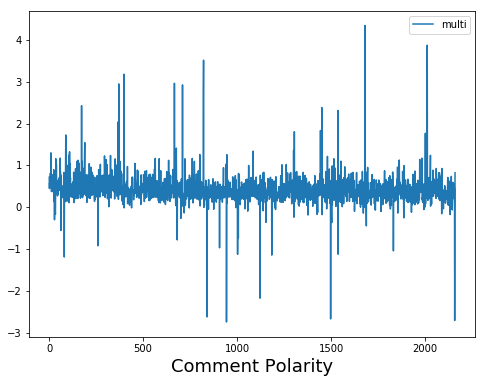

In [119]:
# Reddit Comments Plot

reddit_data_sorted_group.plot(figsize=(8, 6))
plt.xlabel('Comment Polarity', fontsize=18)
plt.savefig('Comment Polarity.png')

In [32]:
# BitCoin
btc = pd.read_csv('btc_usd.csv', encoding = "ISO-8859-1")

In [33]:
btc.head()

,Unnamed: 0,id,datetime,type,quantity,price,total
0,0,148668314,2018-01-01 00:00:01,sell,0.100000,13763.0,1376.300000
1,1,148668317,2018-01-01 00:00:01,buy,0.010000,13766.0,137.660000
2,2,148668334,2018-01-01 00:00:02,buy,0.105929,13767.0,1458.325094
3,3,148668333,2018-01-01 00:00:02,buy,0.244811,13766.0,3370.068777
4,4,148668332,2018-01-01 00:00:02,buy,0.025234,13766.0,347.375374


In [34]:
btc['realtime'] = btc['datetime'].str.slice(5, 13)

In [35]:
btc_ts = btc[['realtime', 'price']]

In [36]:
btc_ts_group = btc_ts.groupby('realtime').mean()

In [37]:
btc_ts_group.head()

,price
realtime,
01-01 00,13606.842210
01-01 01,13461.962401
01-01 02,13333.441535
01-01 03,13447.868240
01-01 04,13426.570852


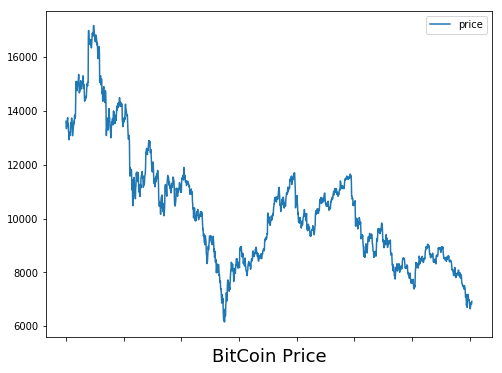

In [118]:


btc_ts_group.plot(figsize=(8, 6))
plt.xlabel('BitCoin Price', fontsize=18)
plt.savefig('BitCoin Price.png')

In [97]:
pricelist = list(btc_ts_group['price'])
pricelist[0:10]

[13606.842209657329,
 13461.962400507895,
 13333.441535331891,
 13447.868240309532,
 13426.570851651983,
 13534.99042529428,
 13648.919943021989,
 13741.448474292241,
 13552.739920680284,
 13526.976279816261]

In [75]:
from sklearn.linear_model import LinearRegression
coef = []
for i in range(1, 48):
    shift_price_listi = [0]*i + pricelist

    pricelisti = pricelist + [0]*i

    slopei = [y - x for x, y in zip(shift_price_listi, pricelisti)]

    slopei = slopei[i: -i]

    slope_df = pd.DataFrame(slopei)



    comments_shiftedi = reddit_data_sorted_group[0: slope_df.shape[0]]
    
    lm = LinearRegression()

    lm.fit(comments_shiftedi,slope_df)
    coef.append(lm.coef_)

print(coef)

[array([[8.83522549]]), array([[9.03225848]]), array([[10.42471478]]), array([[10.0853425]]), array([[3.15452737]]), array([[1.44116199]]), array([[3.55839541]]), array([[8.02965371]]), array([[14.51374113]]), array([[17.49654153]]), array([[16.15299489]]), array([[10.17443716]]), array([[-12.61090252]]), array([[-18.24870148]]), array([[-21.22669145]]), array([[-21.91996315]]), array([[-37.98166761]]), array([[-43.06405949]]), array([[-29.61889344]]), array([[-39.33191265]]), array([[-49.47774859]]), array([[-62.85458122]]), array([[-61.91704455]]), array([[-53.48186014]]), array([[-50.15052947]]), array([[-45.13624248]]), array([[-55.04067111]]), array([[-70.20215655]]), array([[-61.48717337]]), array([[-62.76784942]]), array([[-69.50151766]]), array([[-68.80982554]]), array([[-68.22246342]]), array([[-62.6136561]]), array([[-90.30830072]]), array([[-105.03397152]]), array([[-92.35637911]]), array([[-87.68757063]]), array([[-91.03818606]]), array([[-103.03536406]]), array([[-91.57910

In [110]:
k=11

shift_price_listk = [0]*k + pricelist

pricelistk = pricelist + [0]*k

slopek = [y - x for x, y in zip(shift_price_listk, pricelistk)]

slopek = slopei[k: -k]

slope_df = pd.DataFrame(slopek)



comments_shiftedk = reddit_data_sorted_group[0: slope_df.shape[0]]
comments_shiftedk.index = range(len(slope_df))    
# lm = LinearRegression()
# lm.fit(comments_shiftedk,slope_df)

import statsmodels.api as sm

# print(len(slope_df))
# print(len(comments_shiftedk))
model = sm.OLS(slope_df, comments_shiftedk).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     37.55
Date:                Sun, 30 Sep 2018   Prob (F-statistic):           1.11e-09
Time:                        10:55:55   Log-Likelihood:                -14215.
No. Observations:                1691   AIC:                         2.843e+04
Df Residuals:                    1690   BIC:                         2.844e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
multi       -285.6520     46.614     -6.128      0.000    -377.080    -194.224
==============================================================================
Omnibus:                       34.362   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.178
Skew:                          -0.358   Prob(JB):                     1.39e-08
Kurtosis:                       2.967   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

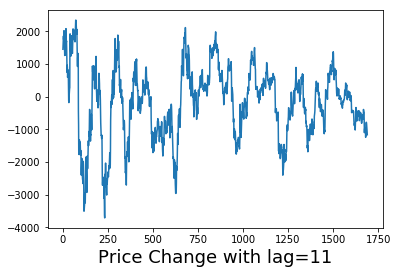

In [122]:

plt.plot( slopek)
plt.xlabel('Price Change with lag=11', fontsize=18)
plt.savefig('Price_Change.png')


In [111]:
slope_df.head()

,0
0,1447.494906
1,1561.939140
2,1717.511223
3,1853.169166
4,1745.546534


In [112]:
comments_shiftedk.head()

,multi
0,0.717129
1,0.447664
2,0.585228
3,0.472910
4,0.609294


In [113]:
lm.coef_

array([[-74.12023014]])

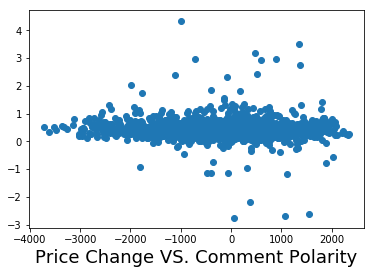

In [124]:
g = plt.scatter(slope_df, comments_shiftedk)

plt.xlabel('Price Change VS. Comment Polarity', fontsize=18)
plt.savefig('Price Change VS. Comment Polarity.png')

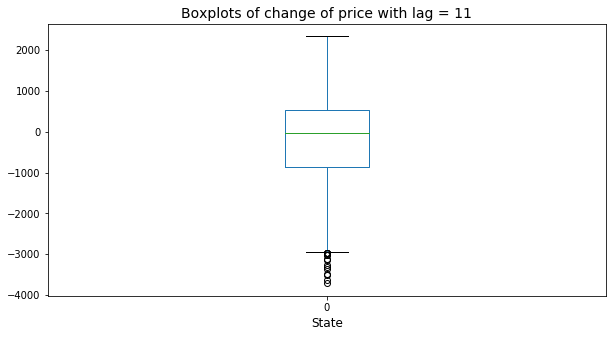

In [120]:
slope_df.plot.box(figsize=(10, 5))
plt.title("Boxplots of change of price with lag = 11", fontsize = 14)
plt.xlabel('State', fontsize=12)
plt.tick_params(labelsize=10)